In [8]:
import nltk
import numpy as np
import pandas as pd
import seaborn as sns

In [1]:
from pymongo import MongoClient
import pandas as pd

In [2]:
client = MongoClient("bağlantınız ve parolanız")
client.test

Database(MongoClient(host=['ac-2xrhs96-shard-00-02.owwq50m.mongodb.net:27017', 'ac-2xrhs96-shard-00-00.owwq50m.mongodb.net:27017', 'ac-2xrhs96-shard-00-01.owwq50m.mongodb.net:27017'], document_class=dict, tz_aware=False, connect=True, retrywrites=True, w='majority', authsource='admin', replicaset='atlas-iujnsw-shard-0', tls=True), 'test')

In [3]:
client.list_database_names()

['firstdatabase',
 'istdata',
 'sample_airbnb',
 'sample_analytics',
 'sample_geospatial',
 'sample_guides',
 'sample_mflix',
 'sample_restaurants',
 'sample_supplies',
 'sample_training',
 'sample_weatherdata',
 'admin',
 'local']

In [4]:
db = client.istdata

In [5]:
db.list_collection_names()

['proje4']

In [6]:
collection = db.get_collection('proje4')
collection

Collection(Database(MongoClient(host=['ac-2xrhs96-shard-00-02.owwq50m.mongodb.net:27017', 'ac-2xrhs96-shard-00-00.owwq50m.mongodb.net:27017', 'ac-2xrhs96-shard-00-01.owwq50m.mongodb.net:27017'], document_class=dict, tz_aware=False, connect=True, retrywrites=True, w='majority', authsource='admin', replicaset='atlas-iujnsw-shard-0', tls=True), 'istdata'), 'proje4')

In [7]:
df = pd.DataFrame(list(collection.find()))
df

,_id,CATEGORY,MESSAGE,FILE_NAME
0,655b5e979c0412f6fabc4bd6,1,"Dear Homeowner,\n\n \n\nInterest Rates are at ...",00249.5f45607c1bffe89f60ba1ec9f878039a
1,655b5e979c0412f6fabc4bd7,1,ATTENTION: This is a MUST for ALL Computer Use...,00373.ebe8670ac56b04125c25100a36ab0510
2,655b5e979c0412f6fabc4bd8,1,This is a multi-part message in MIME format.\n...,00214.1367039e50dc6b7adb0f2aa8aba83216
3,655b5e979c0412f6fabc4bd9,1,IMPORTANT INFORMATION:\n\n\n\nThe new domain n...,00210.050ffd105bd4e006771ee63cabc59978
4,655b5e979c0412f6fabc4bda,1,This is the bottom line. If you can GIVE AWAY...,00033.9babb58d9298daa2963d4f514193d7d6
...,...,...,...,...
5791,655b5eb29c0412f6fabc6275,0,"I'm one of the 30,000 but it's not working ver...",00609.dd49926ce94a1ea328cce9b62825bc97
5792,655b5eb29c0412f6fabc6276,0,Damien Morton quoted:\n\n>W3C approves HTML 4 ...,00957.e0b56b117f3ec5f85e432a9d2a47801f
5793,655b5eb29c0412f6fabc6277,0,"On Mon, 2002-07-22 at 06:50, che wrote:\n\n\n\...",01127.841233b48eceb74a825417d8d918abf8
5794,655b5eb29c0412f6fabc6278,0,"Once upon a time, Manfred wrote :\n\n\n\n> I w...",01178.5c977dff972cd6eef64d4173b90307f0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5796 entries, 0 to 5795
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   _id        5796 non-null   object
 1   CATEGORY   5796 non-null   int64 
 2   MESSAGE    5796 non-null   object
 3   FILE_NAME  5796 non-null   object
dtypes: int64(1), object(3)
memory usage: 181.3+ KB


In [10]:
df.MESSAGE
## mesajların içinde temizlenmesi gereken  html kodları da var

0       Dear Homeowner,\n\n \n\nInterest Rates are at ...
1       ATTENTION: This is a MUST for ALL Computer Use...
2       This is a multi-part message in MIME format.\n...
3       IMPORTANT INFORMATION:\n\n\n\nThe new domain n...
4       This is the bottom line.  If you can GIVE AWAY...
                              ...                        
5791    I'm one of the 30,000 but it's not working ver...
5792    Damien Morton quoted:\n\n>W3C approves HTML 4 ...
5793    On Mon, 2002-07-22 at 06:50, che wrote:\n\n\n\...
5794    Once upon a time, Manfred wrote :\n\n\n\n> I w...
5795    If you run Pick, and then use the "New FTOC" b...
Name: MESSAGE, Length: 5796, dtype: object

In [11]:
df.CATEGORY.value_counts(normalize=True)

CATEGORY
0    0.672878
1    0.327122
Name: proportion, dtype: float64

In [12]:
df['sentiment'] = df['CATEGORY'].apply(lambda x: (x==1 and 'Spam') or 'NotSpam')

In [13]:
df.head()

,_id,CATEGORY,MESSAGE,FILE_NAME,sentiment
0,655b5e979c0412f6fabc4bd6,1,"Dear Homeowner,\n\n \n\nInterest Rates are at ...",00249.5f45607c1bffe89f60ba1ec9f878039a,Spam
1,655b5e979c0412f6fabc4bd7,1,ATTENTION: This is a MUST for ALL Computer Use...,00373.ebe8670ac56b04125c25100a36ab0510,Spam
2,655b5e979c0412f6fabc4bd8,1,This is a multi-part message in MIME format.\n...,00214.1367039e50dc6b7adb0f2aa8aba83216,Spam
3,655b5e979c0412f6fabc4bd9,1,IMPORTANT INFORMATION:\n\n\n\nThe new domain n...,00210.050ffd105bd4e006771ee63cabc59978,Spam
4,655b5e979c0412f6fabc4bda,1,This is the bottom line. If you can GIVE AWAY...,00033.9babb58d9298daa2963d4f514193d7d6,Spam


In [14]:
df = df[['sentiment','MESSAGE']]
df.head(10)

,sentiment,MESSAGE
0,Spam,"Dear Homeowner,\n\n \n\nInterest Rates are at ..."
1,Spam,ATTENTION: This is a MUST for ALL Computer Use...
2,Spam,This is a multi-part message in MIME format.\n...
3,Spam,IMPORTANT INFORMATION:\n\n\n\nThe new domain n...
4,Spam,This is the bottom line. If you can GIVE AWAY...
5,Spam,------=_NextPart_000_00B8_51E06B6A.C8586B31\n\...
6,Spam,"<STYLE type=""text/css"">\n\n<!--\n\nP{\n\n fon..."
7,Spam,<HR>\n\n<html>\n\n<head>\n\n <title>Secured I...
8,Spam,"<table width=""600"" border=""20"" align=""center"" ..."
9,Spam,"<html>\n\n\n\n<head>\n\n<meta http-equiv=""Cont..."


In [15]:
df

,sentiment,MESSAGE
0,Spam,"Dear Homeowner,\n\n \n\nInterest Rates are at ..."
1,Spam,ATTENTION: This is a MUST for ALL Computer Use...
2,Spam,This is a multi-part message in MIME format.\n...
3,Spam,IMPORTANT INFORMATION:\n\n\n\nThe new domain n...
4,Spam,This is the bottom line. If you can GIVE AWAY...
...,...,...
5791,NotSpam,"I'm one of the 30,000 but it's not working ver..."
5792,NotSpam,Damien Morton quoted:\n\n>W3C approves HTML 4 ...
5793,NotSpam,"On Mon, 2002-07-22 at 06:50, che wrote:\n\n\n\..."
5794,NotSpam,"Once upon a time, Manfred wrote :\n\n\n\n> I w..."


In [16]:
import re
import string
# Yorumlar içerisinde geçen sayısal değer barındıran kelimeleri kaldırma
alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)
#
http1 = lambda x: re.sub('http\S+', ' ', x)
#
http2 = lambda x: re.sub('http', ' ', x)
#
at1 = lambda x: re.sub('@\S+', ' ', x)
#
n1 = lambda x: re.sub('\\n', ' ', x)
#
isaret = lambda x: re.sub('[^A-Za-z0-9(),!?@\'\`\"\_\n]', ' ', x)
#
ht_ml = lambda x: re.sub('<[^>]+>', ' ', x)
# Noktalama işaretlerini kaldırma ve tüm kelimeleri küçük harfe dönüştürme
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())
#ingilizce olmayan karakterleri silme adına
e2 = lambda x: re.sub('[^a-zA-Z]', ' ', x)

df['MESSAGE'] = df.MESSAGE.map(alphanumeric).map(http1).map(http2).map(at1).map(n1).map(ht_ml).map(n1).map(punc_lower).map(e2)
df.head(10)

C:\Users\selcu\AppData\Local\Temp\ipykernel_10000\3353004513.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MESSAGE'] = df.MESSAGE.map(alphanumeric).map(http1).map(http2).map(at1).map(n1).map(ht_ml).map(n1).map(punc_lower).map(e2)


,sentiment,MESSAGE
0,Spam,dear homeowner interest rates are at thei...
1,Spam,attention this is a must for all computer use...
2,Spam,this is a multi part message in mime format ...
3,Spam,important information the new domain names...
4,Spam,this is the bottom line if you can give away...
5,Spam,content type text plain charset ...
6,Spam,hello this is chinese traditi...
7,Spam,secured investements ...
8,Spam,click here now simply ama...
9,Spam,answer us n...


In [17]:
df.iloc[230:241]

,sentiment,MESSAGE
230,Spam,free motorola cell phone with cash back ...
231,Spam,b al b vip mail n a bvip mail...
232,Spam,join the web s hottest fastest growing co...
233,Spam,don t miss out on an amazing business opportun...
234,Spam,content type text html charset ...
235,Spam,lose weight while ...
236,Spam,it was the spring of i was just a tall...
237,Spam,request for urgent business assistance ...
238,Spam,...
239,Spam,attention u s homeowners ...


In [18]:
df.sentiment.value_counts(normalize=True)

sentiment
NotSpam    0.672878
Spam       0.327122
Name: proportion, dtype: float64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5796 entries, 0 to 5795
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  5796 non-null   object
 1   MESSAGE    5796 non-null   object
dtypes: object(2)
memory usage: 90.7+ KB


## köklere inme işleminden önce kelimelere bir yazım düzeltme işlemi yapmadım çünkü bu hali ile modelleme sonucunda yeterli başarıyı verdi. nlp çalışması için hazırlanmış bir veri seti olmasından kaynaklı olabilir

## kelime köklerine inmek

In [20]:
from nltk import SnowballStemmer

sbs = SnowballStemmer(language='english')

In [21]:
def stemmer(text):
    text = [sbs.stem(word) for word in text.split(' ')]
    text = " ".join(text)
    return text

df.MESSAGE = df.MESSAGE.apply(stemmer)

C:\Users\selcu\AppData\Local\Temp\ipykernel_10000\588719412.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.MESSAGE = df.MESSAGE.apply(stemmer)


In [22]:
df.head()

,sentiment,MESSAGE
0,Spam,dear homeown interest rate are at their l...
1,Spam,attent this is a must for all comput user ...
2,Spam,this is a multi part messag in mime format ...
3,Spam,import inform the new domain name are fina...
4,Spam,this is the bottom line if you can give away...


## Tokenization & Model Oluşturma

In [23]:
X = df.MESSAGE
y = df.sentiment

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

##  CountVectorizer

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

cv1 = CountVectorizer(stop_words='english') # Stop wordsleri kaldırma

# Train ve Test veri setlerine CountVectorizer uygulama
X_train_cv1 = cv1.fit_transform(X_train)
X_test_cv1  = cv1.transform(X_test)

pd.DataFrame(X_train_cv1.toarray(), columns=cv1.get_feature_names_out()).head()

,aa,aaaa,aaaaaa,aaaaaaa,aaaaaaaa,aaaaaaaaaaaa,aaaaaaaaaaaaaaaa,aaaaaaaaaaaaaaaaaaaa,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa,...,zzjpgvfv,zzop,zzyovdirsvdirsvdir,zzza,zzzlist,zzzz,zzzzcard,zzzzcc,zzzzteana,zzzzv
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
# 2'li N-Gram yöntemini kullanarak tokenize etme
cv2 = CountVectorizer(ngram_range=(1,2), binary=True, stop_words='english')

X_train_cv2 = cv2.fit_transform(X_train)
X_test_cv2  = cv2.transform(X_test)

pd.DataFrame(X_train_cv2.toarray(), columns=cv2.get_feature_names_out()).head()

,aa,aa aa,aa aaij,aa ab,aa ac,aa ad,aa ae,aa af,aa ba,aa bb,...,zzzzcc,zzzzcc john,zzzzcc viewmount,zzzzteana,zzzzteana fwd,zzzzteana mr,zzzzteana subject,zzzzteana van,zzzzv,zzzzv pexofhibogk
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [28]:
# Kelimelere ayırarak oluşturulan DataFrame
lr.fit(X_train_cv1, y_train)
y_pred_cv1 = lr.predict(X_test_cv1)

In [29]:
# 2'li N-Gram yöntemi kullanılarak oluşturulan DataFrame
lr.fit(X_train_cv2, y_train)
y_pred_cv2 = lr.predict(X_test_cv2)

In [30]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def conf_matrix(actual, predicted):
    plt.figure(figsize=[8,8])
    cm = confusion_matrix(actual, predicted)
    sns.heatmap(cm, xticklabels=['Predicted NotSpam', 'Predicted Spam'], 
                yticklabels=['Actual NotSpam', 'Actual Spam'], annot=True,
                fmt='d',cmap='Oranges' ,annot_kws={'fontsize':35}, square=True);

    accuracy = accuracy_score(actual, predicted)
    precision = precision_score(actual, predicted, pos_label='Spam', zero_division=1)
    recall = recall_score(actual, predicted, pos_label='Spam', zero_division=1)
    f1 = f1_score(actual, predicted, pos_label='Spam', zero_division=1)
    # pos_label parametresi precision, recall ve f1 score unu görmek istediğimiz labelı soruyor
    # zero_division parametresi 0'a bölme işlemini gerçekleşirse uyarı verip vermeyeceğini soruyor (1=uyarı verme)

    cm_results = [accuracy, precision, recall, f1]
    return cm_results

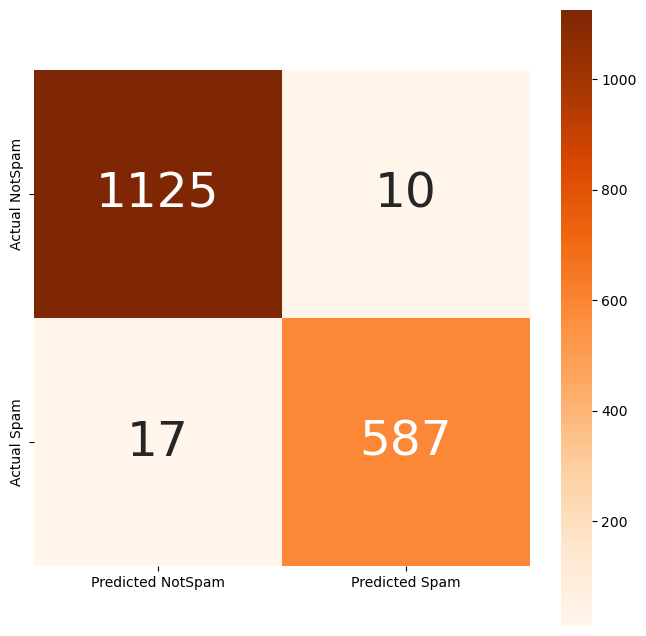

In [31]:
# İlk modelimizden elde ettiğimiz hata matrisi
cm1 = conf_matrix(y_test, y_pred_cv1)

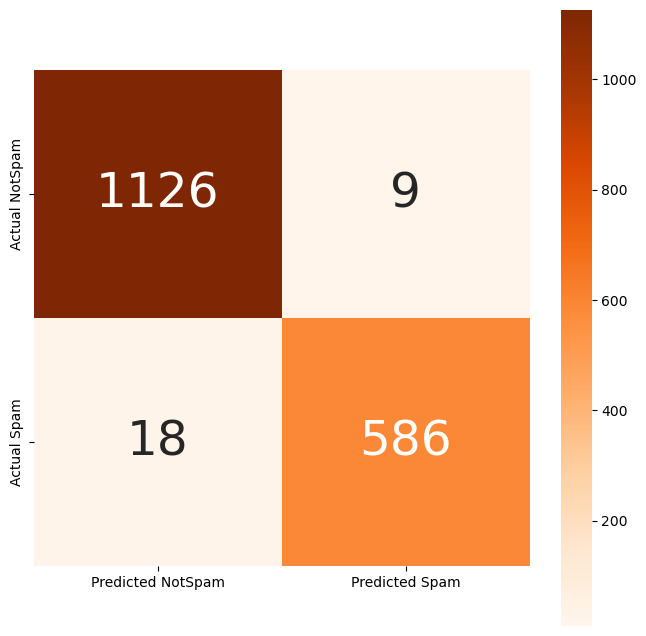

In [32]:
# İkinci modelimizden elde ettiğimiz hata matrisi
cm2 = conf_matrix(y_test, y_pred_cv2)

In [33]:
results = pd.DataFrame(list(zip(cm1, cm2)))
results = results.set_index([['Accuracy', 'Precision', 'Recall', 'F1 Score']])
results.columns = ['LR(Word)-CV', 'LR(N-Grams)-CV']
results

,LR(Word)-CV,LR(N-Grams)-CV
Accuracy,0.984474,0.984474
Precision,0.983250,0.984874
Recall,0.971854,0.970199
F1 Score,0.977519,0.977481


In [34]:
# İlk olarak MultinomialNB algoritmasıyla modellerimizi eğitelim
from sklearn.naive_bayes import MultinomialNB

mnb1 = MultinomialNB()
mnb1.fit(X_train_cv1, y_train)

mnb2 = MultinomialNB()
mnb2.fit(X_train_cv2, y_train)

y_pred_cv1_mnb = mnb1.predict(X_test_cv1)
y_pred_cv2_mnb = mnb2.predict(X_test_cv2)

In [35]:
# Ardından da BernoulliNB algoritmasıyla
from sklearn.naive_bayes import BernoulliNB

bnb1 = BernoulliNB()
bnb1.fit(X_train_cv1, y_train)

bnb2 = BernoulliNB()
bnb2.fit(X_train_cv2, y_train)

y_pred_cv1_bnb = bnb1.predict(X_test_cv1)
y_pred_cv2_bnb = bnb2.predict(X_test_cv2)

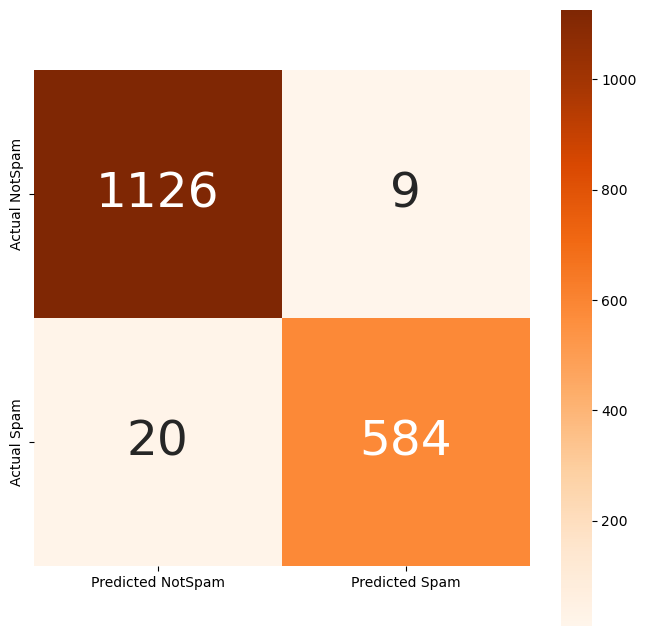

In [36]:
# MultinomialNB & Kelime
cm3 = conf_matrix(y_test, y_pred_cv1_mnb)

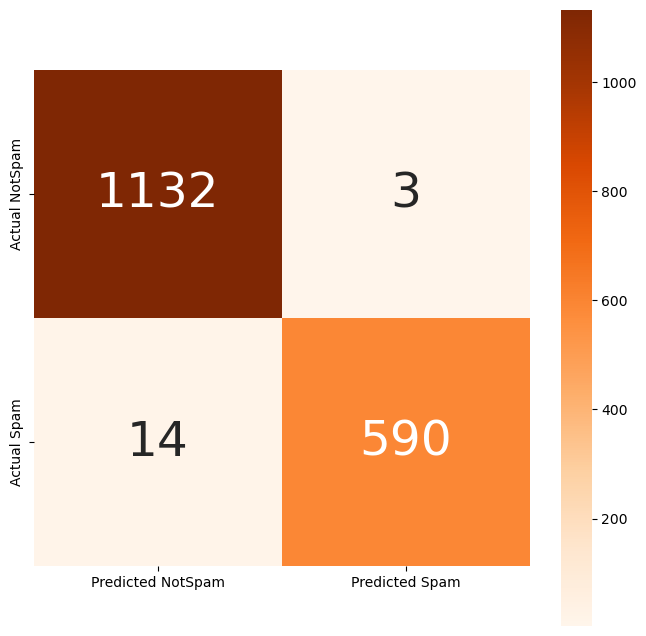

In [37]:
# MultinomialNB & 2'li N-Grams
cm4 = conf_matrix(y_test, y_pred_cv2_mnb)

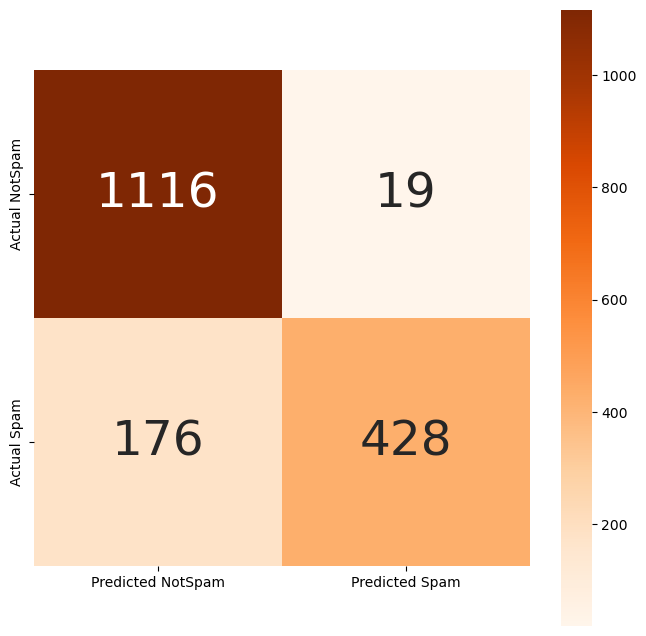

In [38]:
# BernoulliNB & Kelime
cm5 = conf_matrix(y_test, y_pred_cv1_bnb)

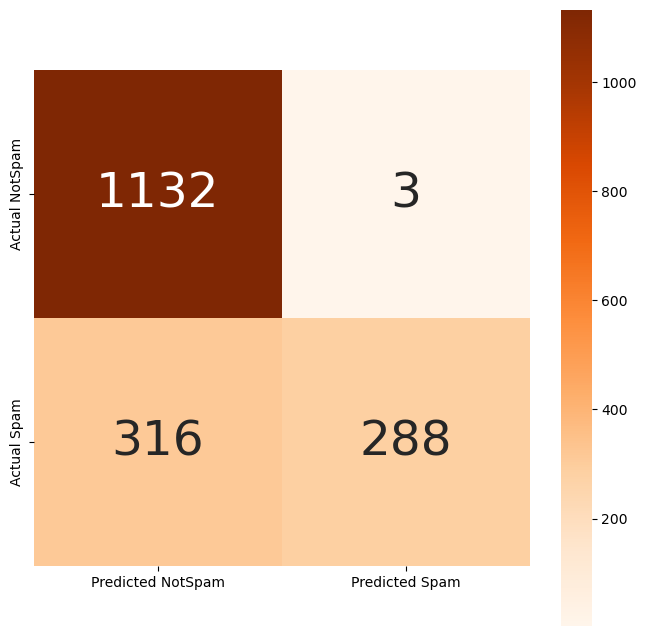

In [39]:
# BernoulliNB & 2'li N-Grams
cm6 = conf_matrix(y_test, y_pred_cv2_bnb)

In [40]:
results_nb = pd.DataFrame(list(zip(cm3, cm4, cm5, cm6)))
results_nb = results_nb.set_index([['Accuracy', 'Precision', 'Recall', 'F1 Score']])
results_nb.columns = ['MNB(Word)-CV', 'MNB(N-Grams)-CV', 'BNB(Word)-CV', 'BNB(N-Grams)-CV']
results_nb

results = pd.concat([results, results_nb], axis=1)
results

,LR(Word)-CV,LR(N-Grams)-CV,MNB(Word)-CV,MNB(N-Grams)-CV,BNB(Word)-CV,BNB(N-Grams)-CV
Accuracy,0.984474,0.984474,0.983324,0.990224,0.887867,0.816561
Precision,0.983250,0.984874,0.984823,0.994941,0.957494,0.989691
Recall,0.971854,0.970199,0.966887,0.976821,0.708609,0.476821
F1 Score,0.977519,0.977481,0.975773,0.985798,0.814462,0.643575


## TFIDF-Vectorizer

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf1 = TfidfVectorizer(stop_words='english')
X_train_tfidf1 = tfidf1.fit_transform(X_train)
X_test_tfidf1  = tfidf1.transform(X_test)

tfidf2 = TfidfVectorizer(ngram_range=(1,2), binary=True, stop_words='english')
X_train_tfidf2 = tfidf2.fit_transform(X_train)
X_test_tfidf2  = tfidf2.transform(X_test)

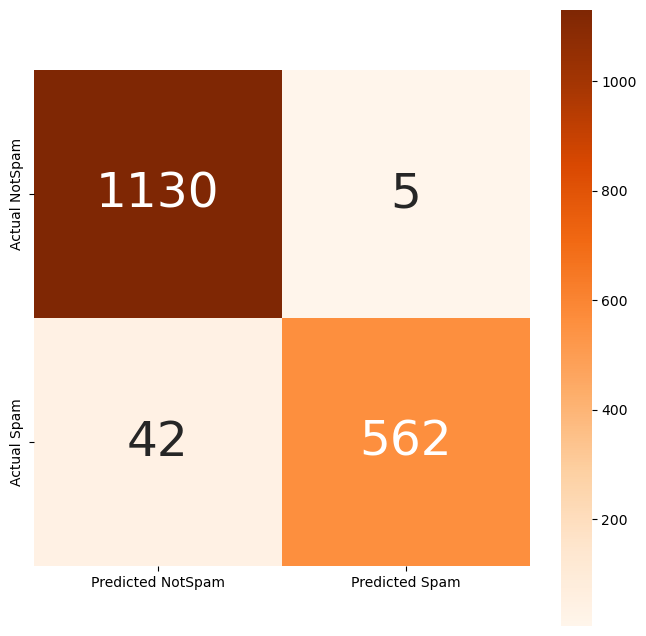

In [42]:
lr.fit(X_train_tfidf1, y_train)
y_pred_tfidf1_lr = lr.predict(X_test_tfidf1)

# Logistic Regresyon & Kelime
cm7 = conf_matrix(y_test, y_pred_tfidf1_lr)

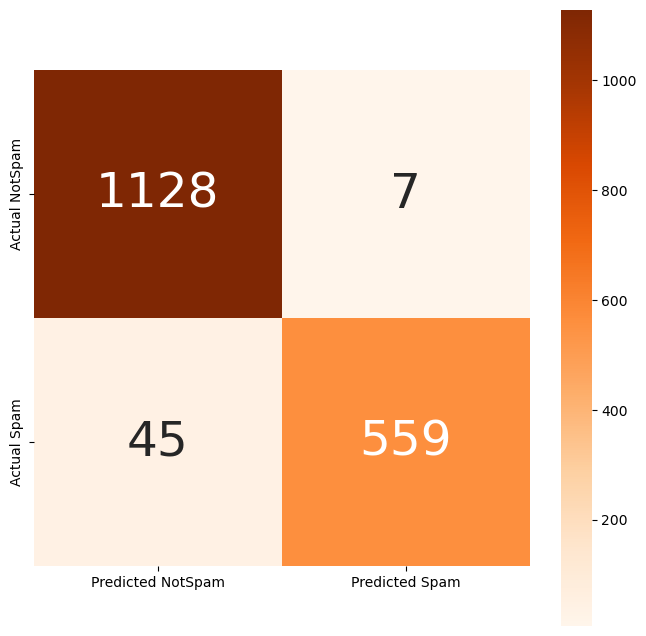

In [43]:
lr.fit(X_train_tfidf2, y_train)
y_pred_tfidf2_lr = lr.predict(X_test_tfidf2)

# Logistic Regresyon & 2'li N-Grams
cm8 = conf_matrix(y_test, y_pred_tfidf2_lr)

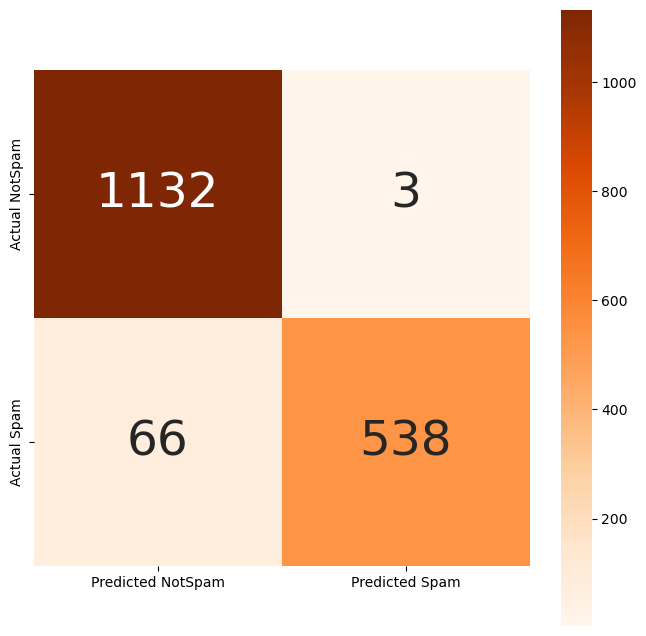

In [44]:
mnb1.fit(X_train_tfidf1.toarray(), y_train)
y_pred_tfidf1_mnb = mnb1.predict(X_test_tfidf1)

# MultinominalNB & Kelime
cm9 = conf_matrix(y_test, y_pred_tfidf1_mnb)

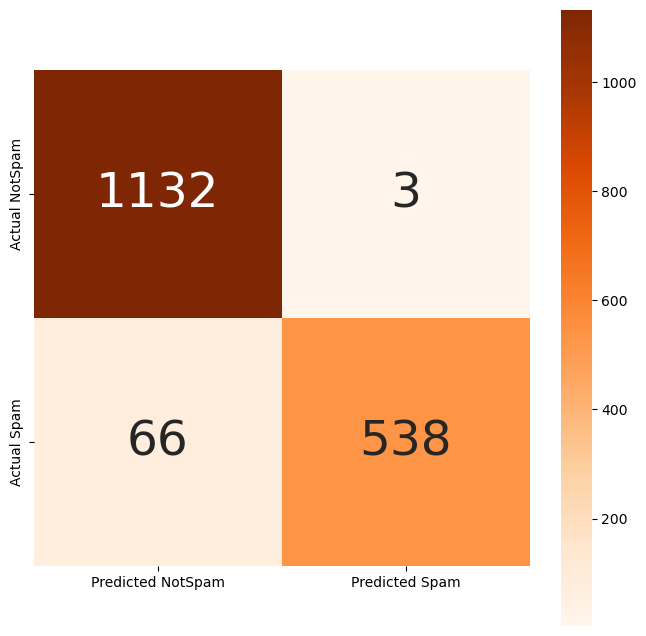

In [45]:
mnb2.fit(X_train_tfidf1.toarray(), y_train)
y_pred_tfidf2_mnb = mnb2.predict(X_test_tfidf1)

# MultinominalNB & 2'li N-Grams
cm10 = conf_matrix(y_test, y_pred_tfidf2_mnb)

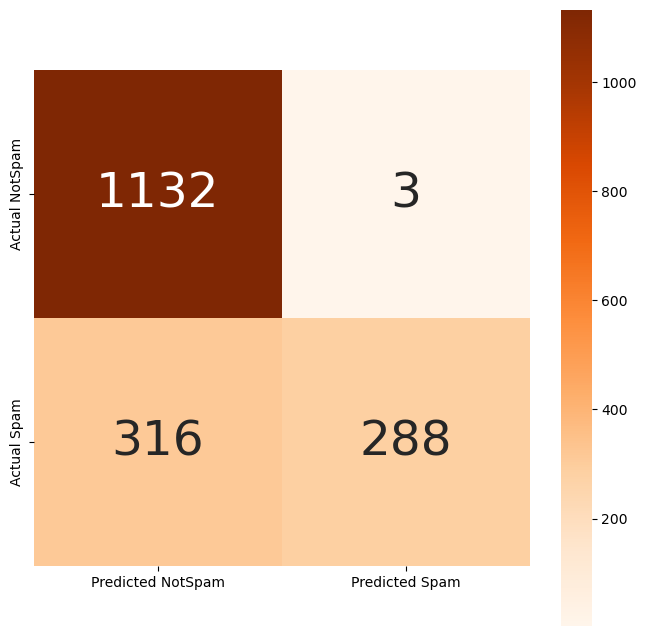

In [46]:
bnb1.fit(X_train_tfidf2.toarray(), y_train)
y_pred_tfidf1_bnb = bnb1.predict(X_test_tfidf2)

# BernoulliNB & Kelime
cm11 = conf_matrix(y_test, y_pred_tfidf1_bnb)

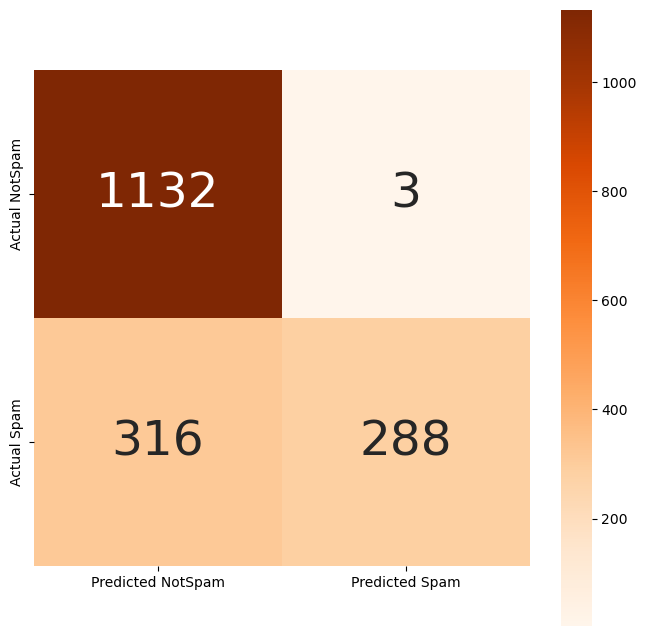

In [47]:
bnb2.fit(X_train_tfidf2.toarray(), y_train)
y_pred_tfidf2_bnb = bnb2.predict(X_test_tfidf2)

# BernoulliNB & 2'li N-Grams
cm12 = conf_matrix(y_test, y_pred_tfidf2_bnb)

In [48]:
results_tf = pd.DataFrame(list(zip(cm7, cm8, cm9, cm10, cm11, cm12)))
results_tf = results_tf.set_index([['Accuracy', 'Precision', 'Recall', 'F1 Score']])
results_tf.columns = ['LR(Word)-TFIDF', 'LR(N-Grams)-TFIDF', 'MNB(Word)-TFIDF', 
                      'MNB(N-Grams)-TFIDF', 'BNB(Word)-TFIDF', 'BNB(N-Grams)-TFIDF']
results_tf

results = pd.concat([results, results_tf], axis=1)
results

,LR(Word)-CV,LR(N-Grams)-CV,MNB(Word)-CV,MNB(N-Grams)-CV,BNB(Word)-CV,BNB(N-Grams)-CV,LR(Word)-TFIDF,LR(N-Grams)-TFIDF,MNB(Word)-TFIDF,MNB(N-Grams)-TFIDF,BNB(Word)-TFIDF,BNB(N-Grams)-TFIDF
Accuracy,0.984474,0.984474,0.983324,0.990224,0.887867,0.816561,0.972973,0.970098,0.960322,0.960322,0.816561,0.816561
Precision,0.983250,0.984874,0.984823,0.994941,0.957494,0.989691,0.991182,0.987633,0.994455,0.994455,0.989691,0.989691
Recall,0.971854,0.970199,0.966887,0.976821,0.708609,0.476821,0.930464,0.925497,0.890728,0.890728,0.476821,0.476821
F1 Score,0.977519,0.977481,0.975773,0.985798,0.814462,0.643575,0.959863,0.955556,0.939738,0.939738,0.643575,0.643575


## MNB(N-GRAMS-CV) EN İYİ SKORLARI VEREN MODEL OLDU